# CQF FINAL PROJECT MODULE 6 2018 
                 DR Abdulaziz Alheraiqi

given the time-contraint I m going to focus as a first step to build a predicting mode given just data of past crude oil price , gold,SP500,down jones index and USD index . For this we retrive The data  from QUNADL. We could have consider other data sets like the Opec basket or Brent but we are considering WTI leading the direction Of crude oil prices.
combining the threee data sets(Gold,DJ index,USD Index ) to predict WTI crude oils prices 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#               ## importing Data

In [2]:
wti= pd.read_csv("wti.csv", parse_dates=['Date'])

In [3]:
gold=pd.read_csv("gold.csv", parse_dates=['Date'])

In [4]:
usdolex=pd.read_csv("FRED-USDollarIndex.csv", parse_dates=['Date'])

In [5]:
snp500=pd.read_csv("snp500.csv", parse_dates=['Date'])

In [6]:
dji=pd.read_csv("dji.csv", parse_dates=['Date'])

#checking the structure of the dataset

In [7]:
wti.head(5)

,Date,Value
0,2018-12-17,49.80
1,2018-12-14,51.26
2,2018-12-13,52.69
3,2018-12-12,51.04
4,2018-11-12,51.65


In [8]:
gold.head(5)

,Date,Value
0,2018-12-17,1241.65
1,2018-12-14,1235.35
2,2018-12-13,1242.75
3,2018-12-12,1245.75
4,2018-11-12,1245.30


In [9]:
usdolex.head(5)

,Date,Value
0,2018-12-28,91.9394
1,2018-12-27,92.2298
2,2018-12-26,92.0290
3,2018-12-24,92.1151
4,2018-12-21,92.1151


In [10]:
snp500.head(5)

,Date,snpClose
0,1986-02-01,209.589996
1,1986-03-01,210.880005
2,1986-06-01,210.649994
3,1986-07-01,213.800003
4,1986-08-01,207.970001


In [11]:
dji.head(5)

,Date,djiClose
0,1985-01-29,1292.619995
1,1985-01-30,1287.880005
2,1985-01-31,1286.770020
3,1985-01-02,1277.719971
4,1985-04-02,1290.079956


#Number of rows and columns

In [12]:
wti.shape

(8324, 2)

In [13]:
gold.columns

Index(['Date', 'Value'], dtype='object')

In [14]:
snp500.columns

Index(['Date', 'snpClose'], dtype='object')

In [15]:
dji.columns

Index(['Date', 'djiClose'], dtype='object')

#name of columns

In [16]:
wti.columns
gold.columns
usdolex.columns
snp500.columns
dji.columns

Index(['Date', 'djiClose'], dtype='object')

#Check the Datatypes

In [17]:
wti.dtypes
gold.dtypes
usdolex.dtypes
snp500.dtypes
dji.dtypes

Date        datetime64[ns]
djiClose           float64
dtype: object

# Visualization

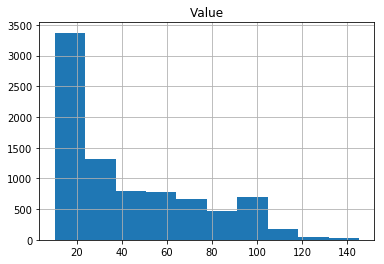

In [18]:
wti.hist()
plt.show()

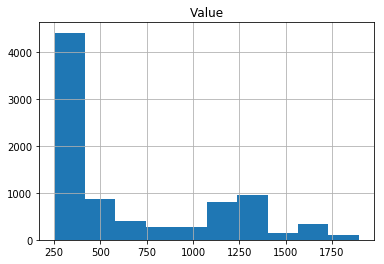

In [19]:
gold.hist()
plt.show()

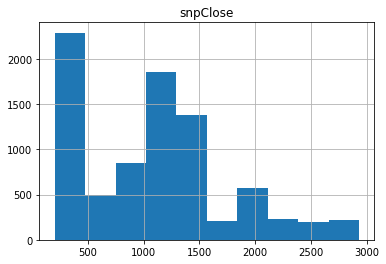

In [20]:
snp500.hist()
plt.show()

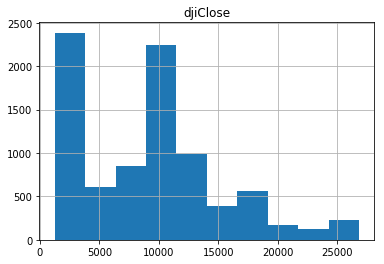

In [21]:
dji.hist()
plt.show()

# #Check for Missing Values

In [22]:
wti.isnull().any()

Date     False
Value    False
dtype: bool

In [23]:
gold.isnull().any()

Date     False
Value    False
dtype: bool

In [24]:
usdolex.isnull().any()

Date     False
Value    False
dtype: bool

In [25]:
snp500.isnull().any()

Date        False
snpClose    False
dtype: bool

In [26]:
dji.isnull().any()

Date        False
djiClose    False
dtype: bool

# No missing values Good Data

#Now try to merge and see if the data is okay

In [27]:
wti.set_index('Date', inplace=True)

In [28]:
gold.set_index('Date', inplace=True)

In [29]:
usdolex.set_index('Date', inplace=True)

In [30]:
snp500.set_index('Date', inplace=True)

In [31]:
dji.set_index('Date', inplace=True)

# Merge the Datasets

In [32]:
#first merge wti and gold then i add USD to the merged and I
#add SNP500 to the merged and finaly i add dji.
#using inner joint.

In [33]:
merged=pd.merge(wti, gold, how='inner', on='Date')

In [34]:
merged=pd.merge(merged, usdolex, how='inner', on='Date')

In [35]:
merged=pd.merge(merged, snp500, how='inner', on='Date')

In [36]:
merged=pd.merge(merged, dji, how='inner', on='Date')

In [37]:

merged.head()

,Value_x,Value_y,Value,snpClose,djiClose
Date,,,,,
2018-12-17,49.80,1241.65,92.2268,2545.939941,23592.98047
2018-12-14,51.26,1235.35,92.4416,2599.949951,24100.50977
2018-12-13,52.69,1242.75,92.1438,2650.540039,24597.38086
2018-12-12,51.04,1245.75,92.0450,2651.070068,24527.26953
2018-11-12,51.65,1245.30,92.4447,2636.780029,24370.24023


In [38]:
mergedalldata = merged

In [39]:
merged.shape

(8218, 5)

In [40]:
merged.columns

Index(['Value_x', 'Value_y', 'Value', 'snpClose', 'djiClose'], dtype='object')

# Rename the columns

In [41]:
merged.columns = ['WTIPrice','GoldPrice','USDOLEX','snpClose','djiClose']



In [42]:
merged.head()

,WTIPrice,GoldPrice,USDOLEX,snpClose,djiClose
Date,,,,,
2018-12-17,49.80,1241.65,92.2268,2545.939941,23592.98047
2018-12-14,51.26,1235.35,92.4416,2599.949951,24100.50977
2018-12-13,52.69,1242.75,92.1438,2650.540039,24597.38086
2018-12-12,51.04,1245.75,92.0450,2651.070068,24527.26953
2018-11-12,51.65,1245.30,92.4447,2636.780029,24370.24023


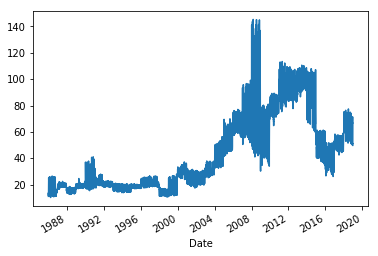

In [43]:
merged['WTIPrice'].plot()
plt.show()

In [44]:
merged['WTIPrice'].max()

145.31

# Lehman Brothers
#03/07/2008	145.31


#Check out the dtypes

In [45]:
merged.dtypes

WTIPrice     float64
GoldPrice    float64
USDOLEX      float64
snpClose     float64
djiClose     float64
dtype: object

# DATA PREPROCESSING

#Check the null values

In [46]:
merged.isnull().any().sum()

0

In [47]:
merged=merged.dropna()

 #Check on the Outliers and remove them from our observations

#Visualizing

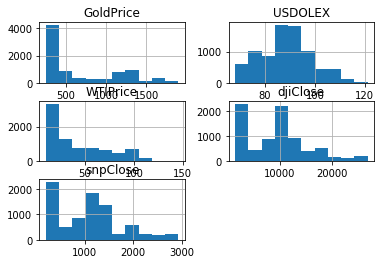

In [48]:
merged.hist()
plt.show()

In [49]:
#Calculating Daily Return  with two methods

In [50]:
daily_PC = merged/merged.shift(1)-1

In [51]:
daily_PC .head()

,WTIPrice,GoldPrice,USDOLEX,snpClose,djiClose
Date,,,,,
2018-12-17,NaN,NaN,NaN,NaN,NaN
2018-12-14,0.029317,-0.005074,0.002329,0.021214,0.021512
2018-12-13,0.027897,0.005990,-0.003221,0.019458,0.020617
2018-12-12,-0.031315,0.002414,-0.001072,0.000200,-0.002850
2018-11-12,0.011951,-0.000361,0.004342,-0.005390,-0.006402


In [52]:
daily_PC.corr()

,WTIPrice,GoldPrice,USDOLEX,snpClose,djiClose
WTIPrice,1.000000,0.118274,-0.120460,0.088742,0.065507
GoldPrice,0.118274,1.000000,-0.335164,-0.051947,-0.063472
USDOLEX,-0.120460,-0.335164,1.000000,-0.033026,-0.016719
snpClose,0.088742,-0.051947,-0.033026,1.000000,0.965739
djiClose,0.065507,-0.063472,-0.016719,0.965739,1.000000


In [53]:
Pct = merged.pct_change()

In [54]:
Pct.head(5)

,WTIPrice,GoldPrice,USDOLEX,snpClose,djiClose
Date,,,,,
2018-12-17,NaN,NaN,NaN,NaN,NaN
2018-12-14,0.029317,-0.005074,0.002329,0.021214,0.021512
2018-12-13,0.027897,0.005990,-0.003221,0.019458,0.020617
2018-12-12,-0.031315,0.002414,-0.001072,0.000200,-0.002850
2018-11-12,0.011951,-0.000361,0.004342,-0.005390,-0.006402


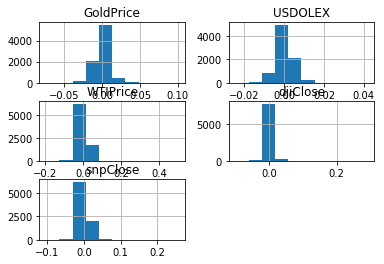

In [55]:
Pct.hist()
plt.show()

#The Daily Return columns are not giving a significant correlation result and will not be 
#used in prediction

In [56]:
# EDA Statistics


In [57]:
merged.describe()

,WTIPrice,GoldPrice,USDOLEX,snpClose,djiClose
count,8218.000000,8218.000000,8218.000000,8218.000000,8218.000000
mean,43.848073,678.883579,88.563758,1095.696655,9555.920422
std,29.593712,443.008709,10.157936,644.570141,5818.016886
min,10.250000,252.800000,68.013700,203.490005,1502.290039
25%,19.620000,353.600000,81.605575,460.717491,3741.904907
50%,30.095000,409.725000,88.715400,1113.380005,9973.145019
75%,64.627500,1141.375000,94.652625,1402.287537,12427.132327
max,145.310000,1895.000000,121.104500,2930.750000,26828.390630


In [58]:
merged.median()

WTIPrice       30.095000
GoldPrice     409.725000
USDOLEX        88.715400
snpClose     1113.380005
djiClose     9973.145019
dtype: float64

In [59]:
Pct.describe()

,WTIPrice,GoldPrice,USDOLEX,snpClose,djiClose
count,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000
mean,0.000241,-0.000113,0.000042,-0.000239,-0.000270
std,0.025561,0.009989,0.004417,0.011497,0.011273
min,-0.195102,-0.074169,-0.024552,-0.103782,-0.099751
25%,-0.012663,-0.004850,-0.002394,-0.005585,-0.005653
50%,-0.000678,0.000000,-0.000027,-0.000590,-0.000562
75%,0.012214,0.004382,0.002478,0.004441,0.004461
max,0.501397,0.100717,0.041921,0.257339,0.292160


In [60]:
Pct.median()

WTIPrice    -0.000678
GoldPrice    0.000000
USDOLEX     -0.000027
snpClose    -0.000590
djiClose    -0.000562
dtype: float64

In [61]:

#Five Point Summary

In [62]:
merged.min()

WTIPrice       10.250000
GoldPrice     252.800000
USDOLEX        68.013700
snpClose      203.490005
djiClose     1502.290039
dtype: float64

In [63]:
merged.min()

WTIPrice       10.250000
GoldPrice     252.800000
USDOLEX        68.013700
snpClose      203.490005
djiClose     1502.290039
dtype: float64

In [64]:
merged.quantile()

WTIPrice       30.095000
GoldPrice     409.725000
USDOLEX        88.715400
snpClose     1113.380005
djiClose     9973.145019
Name: 0.5, dtype: float64

In [65]:
merged.quantile(0.25)

WTIPrice       19.620000
GoldPrice     353.600000
USDOLEX        81.605575
snpClose      460.717491
djiClose     3741.904907
Name: 0.25, dtype: float64

In [66]:
merged.quantile(0.75)


WTIPrice        64.627500
GoldPrice     1141.375000
USDOLEX         94.652625
snpClose      1402.287537
djiClose     12427.132327
Name: 0.75, dtype: float64

# Shape of the curve

In [67]:
merged.kurtosis()

WTIPrice    -0.359792
GoldPrice   -0.659400
USDOLEX     -0.258177
snpClose    -0.082539
djiClose     0.062928
dtype: float64

In [68]:
merged.skew()

WTIPrice     0.903529
GoldPrice    0.912157
USDOLEX      0.242538
snpClose     0.643051
djiClose     0.650634
dtype: float64


#Checking for Outliers
#Location of the outliers

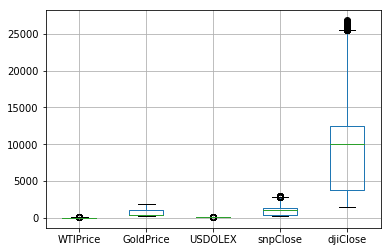

In [69]:
merged.boxplot()
plt.show()

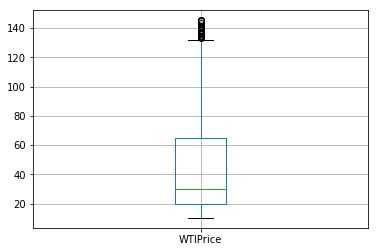

In [70]:
merged.boxplot(column='WTIPrice', return_type='axes')
plt.show()

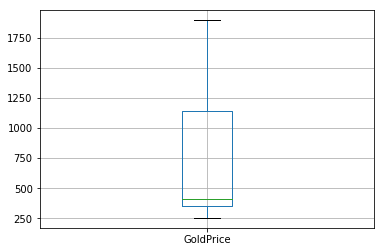

In [71]:
merged.boxplot(column='GoldPrice', return_type='axes')
plt.show()

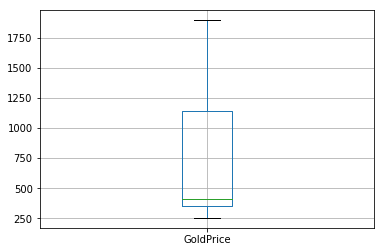

In [72]:
merged.boxplot(column='GoldPrice', return_type='axes')
plt.show()

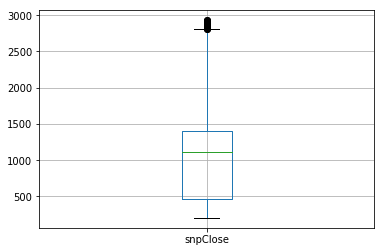

In [73]:
merged.boxplot(column='snpClose', return_type='axes')
plt.show()

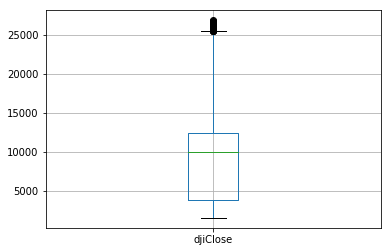

In [74]:
merged.boxplot(column='djiClose', return_type='axes')
plt.show()

# Data Outliers

In [75]:
merged.quantile()

WTIPrice       30.095000
GoldPrice     409.725000
USDOLEX        88.715400
snpClose     1113.380005
djiClose     9973.145019
Name: 0.5, dtype: float64

In [76]:
merged.quantile(0.25) * 1.5

WTIPrice       29.430000
GoldPrice     530.400000
USDOLEX       122.408363
snpClose      691.076236
djiClose     5612.857361
Name: 0.25, dtype: float64

In [77]:
merged.quantile(0.75) * 1.5

WTIPrice        96.941250
GoldPrice     1712.062500
USDOLEX        141.978938
snpClose      2103.431306
djiClose     18640.698491
Name: 0.75, dtype: float64

In [78]:
wtiQ1=merged['WTIPrice'].quantile(0.25) * 1.5

In [79]:
print(wtiQ1)

29.43


In [80]:
wtiQ3=merged['WTIPrice'].quantile(0.75) *1.5
print(wtiQ3)

96.94125


In [81]:
goldQ1=merged['GoldPrice'].quantile(0.25) *1.5
print(goldQ1)

530.4000000000001


In [82]:
goldQ3=merged['GoldPrice'].quantile(0.75) * 1.5

In [83]:
usdolexQ1=merged['USDOLEX'].quantile(0.25) *1.5
print(usdolexQ1)

122.40836250000001


In [84]:
usdolexQ3=merged['USDOLEX'].quantile(0.75) *1.5
print(usdolexQ3)

141.9789375


In [85]:
snp500Q1=merged['snpClose'].quantile(0.25) * 1.5
print(snp500Q1)

691.076236125


In [86]:
snp500Q1=merged['snpClose'].quantile(0.75) * 1.5

In [87]:
snp500Q3=merged['snpClose'].quantile(0.75) * 1.5

In [88]:
djiQ1=merged['djiClose'].quantile(0.25) * 1.5
print(djiQ1)

5612.8573605


In [89]:
djiQ3=merged['djiClose'].quantile(0.75) * 1.5
print(djiQ3)

18640.698491249997


In [90]:
#Counting the number of outliers

In [91]:
merged.head(5)


,WTIPrice,GoldPrice,USDOLEX,snpClose,djiClose
Date,,,,,
2018-12-17,49.80,1241.65,92.2268,2545.939941,23592.98047
2018-12-14,51.26,1235.35,92.4416,2599.949951,24100.50977
2018-12-13,52.69,1242.75,92.1438,2650.540039,24597.38086
2018-12-12,51.04,1245.75,92.0450,2651.070068,24527.26953
2018-11-12,51.65,1245.30,92.4447,2636.780029,24370.24023


In [92]:
merged['WTIPrice'].loc[merged['WTIPrice'] <=wtiQ1].count()

4025

In [93]:
merged['WTIPrice'].loc[merged['WTIPrice'] >=wtiQ3].count()

618

In [94]:
merged['GoldPrice'].loc[merged['GoldPrice'] <=goldQ1].count()

4990

In [95]:
merged['GoldPrice'].loc[merged['GoldPrice'] >=goldQ3].count()


132

In [96]:
merged['USDOLEX'].loc[merged['USDOLEX'] <=usdolexQ1].count()

8218

In [97]:
merged['USDOLEX'].loc[merged['USDOLEX'] >=usdolexQ3].count()

0

In [98]:
merged['snpClose'].loc[merged['snpClose'] <=snp500Q1].count()

7551

In [99]:
merged['snpClose'].loc[merged['snpClose'] >=snp500Q3].count()


667

In [100]:
merged['djiClose'].loc[merged['djiClose'] <=djiQ1].count()

2587

In [101]:
merged['djiClose'].loc[merged['djiClose'] >=djiQ3].count()

521

#Decide on Outlier treatment
#as outlier constitute significant part of data
#the decision is to keep the outlier

#Is there a relationship between Gold and Oil

In [102]:
merged.corr()

,WTIPrice,GoldPrice,USDOLEX,snpClose,djiClose
WTIPrice,1.000000,0.808054,-0.751228,0.571291,0.616226
GoldPrice,0.808054,1.000000,-0.629712,0.655953,0.696895
USDOLEX,-0.751228,-0.629712,1.000000,-0.210207,-0.260039
snpClose,0.571291,0.655953,-0.210207,1.000000,0.994617
djiClose,0.616226,0.696895,-0.260039,0.994617,1.000000


In [103]:
## there stronge positive corrrelation between Crude oil prices and Gold 
## prices (.8)and negative correlation with USD(-.75)
## and positive correlation with stock market more with adj Dow jones close


In [104]:
#Decision to drop Snp500 and keep DJI as both represent the stock market and having both of them puts
#too much of a weight on stock market for our prediction

In [105]:
merged.head(5)

,WTIPrice,GoldPrice,USDOLEX,snpClose,djiClose
Date,,,,,
2018-12-17,49.80,1241.65,92.2268,2545.939941,23592.98047
2018-12-14,51.26,1235.35,92.4416,2599.949951,24100.50977
2018-12-13,52.69,1242.75,92.1438,2650.540039,24597.38086
2018-12-12,51.04,1245.75,92.0450,2651.070068,24527.26953
2018-11-12,51.65,1245.30,92.4447,2636.780029,24370.24023


In [106]:
merged=merged.drop('snpClose', axis=1)

In [107]:
merged.columns

Index(['WTIPrice', 'GoldPrice', 'USDOLEX', 'djiClose'], dtype='object')

In [108]:
merged.head(5)

,WTIPrice,GoldPrice,USDOLEX,djiClose
Date,,,,
2018-12-17,49.80,1241.65,92.2268,23592.98047
2018-12-14,51.26,1235.35,92.4416,24100.50977
2018-12-13,52.69,1242.75,92.1438,24597.38086
2018-12-12,51.04,1245.75,92.0450,24527.26953
2018-11-12,51.65,1245.30,92.4447,24370.24023


# Prediction

In [109]:
#The Prediction works only in standard circumstances barring acts of 
#God such as
#War and Natural Calamities
#The assumption is that there exists a Linear relationship between 
#Features and Target V

# ##Tomorrow's price Prediction 
###based on Regression

In [110]:
import sklearn

In [111]:
 from sklearn.model_selection import cross_val_score as cross_validation

In [112]:
from sklearn.utils import shuffle

In [113]:
from sklearn import linear_model

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
#Splitting data into Target variable and features

In [119]:
#targetprice=merged['WTIPrice']Splitting data into Target variable 
#and features

In [120]:
targetprice= merged['WTIPrice']

In [121]:
targetprice.head()

Date
2018-12-17    49.80
2018-12-14    51.26
2018-12-13    52.69
2018-12-12    51.04
2018-11-12    51.65
Name: WTIPrice, dtype: float64

In [122]:
features=merged[['GoldPrice','USDOLEX','djiClose']]
features.head(5)

,GoldPrice,USDOLEX,djiClose
Date,,,
2018-12-17,1241.65,92.2268,23592.98047
2018-12-14,1235.35,92.4416,24100.50977
2018-12-13,1242.75,92.1438,24597.38086
2018-12-12,1245.75,92.0450,24527.26953
2018-11-12,1245.30,92.4447,24370.24023


In [123]:
features.columns

Index(['GoldPrice', 'USDOLEX', 'djiClose'], dtype='object')

In [124]:
#Shuffling the data

In [125]:

features=shuffle(features,random_state=0)

In [126]:
targetprice=shuffle(targetprice, random_state=0)

In [127]:
targetprice.head(5)

Date
1994-12-12    16.92
1989-10-16    20.64
2015-04-15    56.25
1987-09-18    19.58
2004-12-20    45.57
Name: WTIPrice, dtype: float64

In [128]:
features.head(5)

,GoldPrice,USDOLEX,djiClose
Date,,,
1994-12-12,377.15,87.3410,3718.370117
1989-10-16,368.40,95.1866,2657.379883
2015-04-15,1192.90,91.9237,18112.609380
1987-09-18,461.70,96.4384,2524.639893
2004-12-20,442.45,80.4400,10661.599610


# Dividing data into Train and Test

In [129]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [130]:
X_train, X_test, y_train, y_test = train_test_split(
  features,targetprice , test_size=0.4, random_state=0)

In [131]:
X_train.head(5)

,GoldPrice,USDOLEX,djiClose
Date,,,
1990-05-11,376.90,83.1760,2502.229980
1990-03-21,392.00,94.6451,2727.929932
1989-01-17,402.25,91.0742,2214.639893
1986-05-08,358.50,105.9514,1777.000000
1995-12-10,384.45,84.0274,4764.879883


In [132]:
 y_train.head(5)

Date
1990-05-11    32.05
1990-03-21    19.59
1989-01-17    19.03
1986-05-08    14.35
1995-12-10    17.08
Name: WTIPrice, dtype: float64

In [133]:
y_train.describe()

count    4930.000000
mean       44.170213
std        29.706630
min        10.250000
25%        19.710000
50%        30.340000
75%        64.915000
max       144.960000
Name: WTIPrice, dtype: float64

In [134]:
X_train.describe()

,GoldPrice,USDOLEX,djiClose
count,4930.000000,4930.000000,4930.000000
mean,686.130690,88.564010,9656.364805
std,447.326771,10.191675,5833.404046
min,253.300000,68.013700,1502.290039
25%,354.250000,81.600425,3831.817505
50%,411.500000,88.780450,10012.615235
75%,1162.425000,94.724025,12486.419678
max,1895.000000,121.104500,26743.500000


In [135]:
 X_test.describe()

,GoldPrice,USDOLEX,djiClose
count,3288.000000,3288.000000,3288.000000
mean,668.017321,88.563379,9405.314944
std,436.296354,10.108685,5792.491332
min,252.800000,68.027100,1513.530029
25%,352.737500,81.615400,3648.172425
50%,407.000000,88.599650,9922.450195
75%,1117.625000,94.553900,12343.972168
max,1877.500000,121.060500,26828.390630


In [136]:
 y_test.describe()

count    3288.000000
mean       43.365058
std        29.421489
min        10.820000
25%        19.410000
50%        29.510000
75%        64.127500
max       145.310000
Name: WTIPrice, dtype: float64

# Linear Regression on WTI and Gold data

In [137]:
regr_1= linear_model.LinearRegression()

In [138]:
regr_1.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# #Decision Tree Regressor

In [139]:
regr_2 = DecisionTreeRegressor(max_depth=2)

In [140]:
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# Random Forest Regressor

In [141]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [142]:
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

# Making the prediction from Test data

In [143]:
y_pred= regr_1.predict(X_test)

In [144]:
y_pred= regr_2.predict(X_test)

In [145]:
y_pred= rf.predict(X_test)


In [146]:
#Metrics for Linear Regression only

In [147]:
print("Coefficients: ", regr_1.coef_)

Coefficients:  [ 2.09674152e-02 -1.41450665e+00  1.36458620e-03]


In [148]:
#Mean squared error

In [149]:
print("mean squared error:  ",mean_squared_error(y_test,y_pred))

mean squared error:   7.884098956322659


In [150]:
#Variance score
print("Variance score: ",   r2_score(y_test, y_pred))

Variance score:  0.9908892345987761


In [151]:
#Accuracy Score for other algorithms than Linear Regression

In [152]:
regr_1.score(X_test, y_test)

0.7860372027552542

In [153]:
regr_2.score(X_test, y_test)

0.8805252066394172

In [154]:
rf.score(X_test, y_test)

0.990889234598776

In [155]:
#Recommendation is to use Decision Tree Regressor 
#Random Forest Regressor is overfitting in this scenario


In [156]:
#STANDARD DEVIATION

In [157]:
stdprc=targetprice.std()
stdprc

29.5937115179133

In [158]:
merged.head(5)

,WTIPrice,GoldPrice,USDOLEX,djiClose
Date,,,,
2018-12-17,49.80,1241.65,92.2268,23592.98047
2018-12-14,51.26,1235.35,92.4416,24100.50977
2018-12-13,52.69,1242.75,92.1438,24597.38086
2018-12-12,51.04,1245.75,92.0450,24527.26953
2018-11-12,51.65,1245.30,92.4447,24370.24023


In [171]:
gold.head(5)

,Value
Date,
2018-12-17,1241.65
2018-12-14,1235.35
2018-12-13,1242.75
2018-12-12,1245.75
2018-11-12,1245.30


In [172]:
WTINextDayPredict=regr_1.predict([[1257.6,95.25,19000]])


In [173]:
WTINextDayPredict

array([59.445266])

In [174]:
WTINextDayPredict=regr_2.predict([[1257.6,95.25,19000]])

In [175]:
WTINextDayPredict

array([56.11483903])

In [176]:
WTINextDayPredict=rf.predict([[1257.6,95.25,19000]])

In [177]:
WTINextDayPredict

array([47.86283])

In [178]:
#_x_ is the standard deviation of the Diff between Open 
#and Close of sensex so this rang

In [179]:
print("WTI Next Day Price Prediction Likely to Close at: ",WTINextDayPredict , "(+-Standard Deviation)")

WTI Next Day Price Prediction Likely to Close at:  [47.86283] (+-Standard Deviation)


In [180]:
print("WTI Next Day Price: ",WTINextDayPredict+stdprc , " & " , WTINextDayPredict-stdprc)


WTI Next Day Price:  [77.45654152]  &  [18.26911848]


# Finding how far I need to take historical data to improve my prediction

In [183]:
##doing the same prediction for 10 years,7 years,5 years,3years,2years and 
##one year
##I ploted the correlation and the prediction accuracy in 
##seperate excel sheet attached (Model_Evaluation_Analysis)


# Autoregressive Integrated Moving Average Model

In [184]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 

In [185]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [186]:
series = wti.head(5000)

In [187]:
series.describe()

,Value
count,5000.000000
mean,60.239622
std,27.666358
min,11.380000
25%,34.577500
50%,57.580000
75%,82.785000
max,145.310000


C:\Users\asua\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


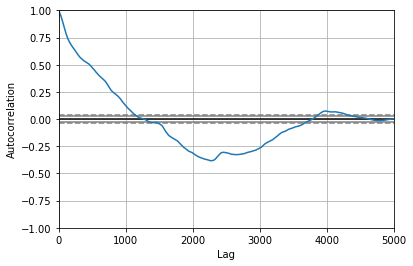

In [188]:
autocorrelation_plot(series)
pyplot.show()

# fit model

In [189]:
model = ARIMA(series, order=(5,1,0))

C:\Users\asua\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\asua\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [190]:
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\asua\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\asua\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\asua\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array i

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                 4999
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8798.399
Method:                       css-mle   S.D. of innovations              1.406
Date:                Tue, 15 Jan 2019   AIC                          17610.798
Time:                        09:37:12   BIC                          17656.417
Sample:                             1   HQIC                         17626.787
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0076      0.019     -0.408      0.683      -0.044       0.029
ar.L1.D.Value    -0.0469      0.014     -3.323      0.001      -0.075      -0.019
ar.L2.D.Value    -0.0244      0.014     

In [191]:
# plot residual errors

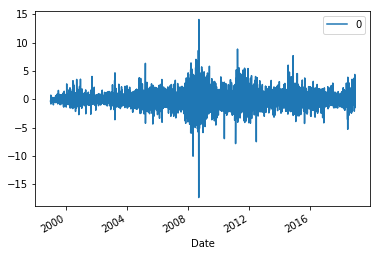

In [192]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

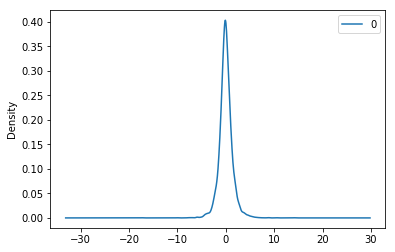

                 0
count  4999.000000
mean      0.000023
std       1.406625
min     -17.380013
25%      -0.692122
50%      -0.039731
75%       0.663310
max      14.092980


In [193]:
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

The distribution of the residual errors is displayed.
The results show that indeed there is No  bias in the prediction (a zero mean in the residuals).

Rolling Forecast ARIMA Model

In [194]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 

In [195]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [196]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=58.332331, expected=57.750000
predicted=57.873749, expected=56.300000
predicted=56.368980, expected=56.200000
predicted=56.180533, expected=57.850000
predicted=57.723464, expected=57.050000
predicted=57.026224, expected=57.600000
predicted=57.707631, expected=57.450000
predicted=57.474748, expected=57.800000
predicted=57.709773, expected=59.650000
predicted=59.607020, expected=59.700000
predicted=59.636522, expected=59.400000
predicted=59.487064, expected=60.600000
predicted=60.596496, expected=61.700000
predicted=61.534944, expected=59.750000
predicted=59.839189, expected=59.850000
predicted=59.979387, expected=59.800000
predicted=59.723804, expected=61.300000
predicted=61.132950, expected=61.030000
predicted=61.095720, expected=60.850000
predicted=60.906947, expected=62.830000
predicted=62.786835, expected=60.630000
predicted=60.605604, expected=61.050000
predicted=61.155284, expected=61.040000
predicted=61.033696, expected=62.110000
predicted=61.924847, expected=62.940000


In [198]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


Test MSE: 0.727


In [199]:
# plot

In [200]:
from matplotlib import pyplot

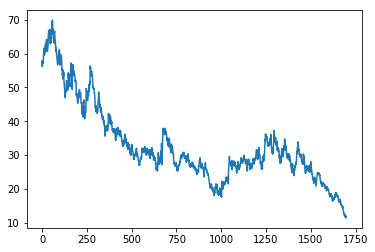

In [202]:
pyplot.plot(test)
pyplot.show()

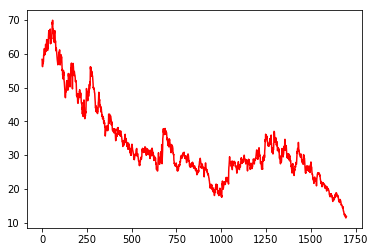

In [203]:
pyplot.plot(predictions, color='red')
pyplot.show()